In [1]:
import pandas as pd
from barplots import barplots

In [2]:
df = pd.read_csv("approximated_walks.csv")
df["Max Neighbours"] = [
    "10" if val == 10 else "Max"
    for val in df["Max Neighbours"].values
]

In [3]:
df

,run_type,embedding_model,Max Neighbours,loss,accuracy,recall,precision,AUROC,AUPRC,f1_score,balanced_accuracy,specificity,miss_rate,fall_out,mcc
0,train,SkipGram,10,0.129557,0.962037,0.962034,0.962039,0.992005,0.991220,0.962036,0.962037,0.962040,0.037966,0.037960,0.924073
1,test,SkipGram,10,0.147156,0.956834,0.951787,0.961493,0.989533,0.989616,0.956615,0.956834,0.961882,0.048213,0.038118,0.913715
2,train,SkipGram,Max,0.120389,0.965638,0.962744,0.968348,0.993200,0.992583,0.965538,0.965638,0.968531,0.037256,0.031469,0.931291
3,test,SkipGram,Max,0.138156,0.960222,0.951605,0.968292,0.990829,0.991085,0.959876,0.960222,0.968839,0.048395,0.031161,0.920581
4,train,SkipGram,10,0.135195,0.957820,0.975852,0.941885,0.991038,0.990056,0.958567,0.957820,0.939789,0.024148,0.060211,0.916237
5,test,SkipGram,10,0.146127,0.954525,0.968990,0.941745,0.989207,0.988901,0.955173,0.954525,0.940060,0.031010,0.059940,0.909431
6,train,SkipGram,Max,0.129628,0.961471,0.959363,0.963425,0.991851,0.991036,0.961390,0.961471,0.963579,0.040637,0.036421,0.922950
7,test,SkipGram,Max,0.145278,0.956697,0.949875,0.963014,0.989624,0.989494,0.956399,0.956697,0.963519,0.050125,0.036481,0.913479
8,train,SkipGram,10,0.146545,0.951596,0.977077,0.929698,0.989939,0.989060,0.952799,0.951596,0.926115,0.022923,0.073885,0.904368
9,test,SkipGram,10,0.156594,0.948411,0.971040,0.928996,0.988182,0.987935,0.949553,0.948411,0.925783,0.028960,0.074217,0.897743


In [4]:
from scipy.stats import wilcoxon
results = []

for metric in df.columns[4:]:
    statistic, p_value = wilcoxon(
        df[df.run_type == "test"][df["Max Neighbours"] == "Max"][metric],
        df[df.run_type == "test"][df["Max Neighbours"] == "10"][metric],
    )
    results.append({
        "Metric": metric,
        "P-value": p_value,
        "statistic": statistic
    })
results = pd.DataFrame(results).T
new_header = results.iloc[0] #grab the first row for the header
results = results[1:] #take the data less the header row
results.columns = new_header #set the header row as the df header
print(results[["accuracy", "AUROC", "AUPRC", "f1_score"]].to_latex())

\begin{tabular}{lllll}
\toprule
Metric &  accuracy &     AUROC &     AUPRC &  f1\_score \\
\midrule
P-value   &  0.016605 &  0.005062 &  0.005062 &  0.021824 \\
statistic &  4.000000 &  0.000000 &  0.000000 &  5.000000 \\
\bottomrule
\end{tabular}



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Rendering barplots:   0%|          | 0/12 [00:00<?, ?it/s]

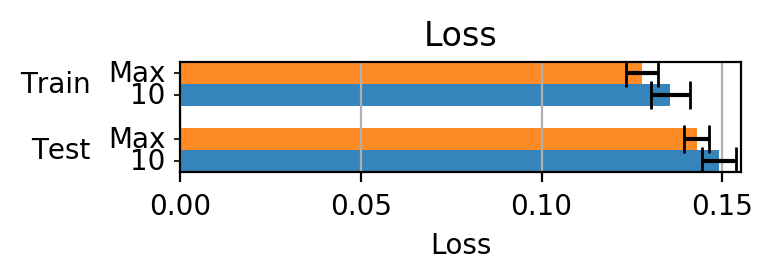

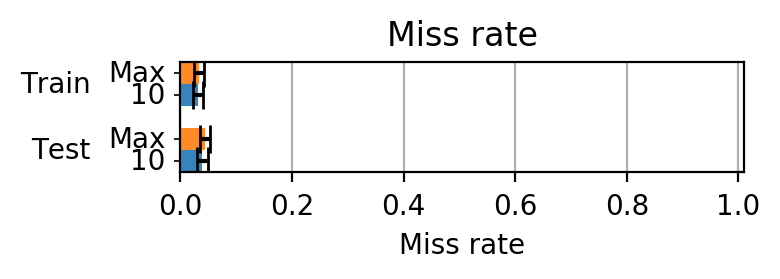

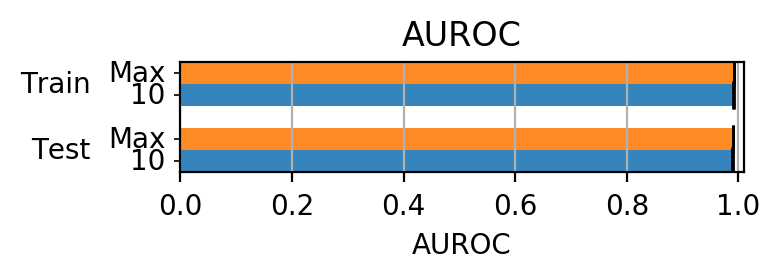

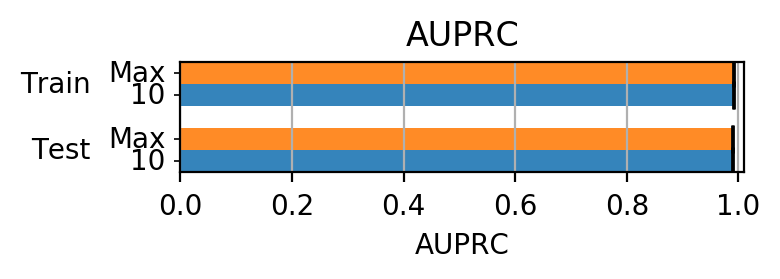

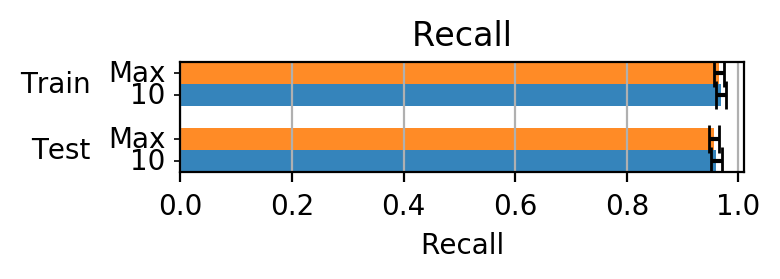

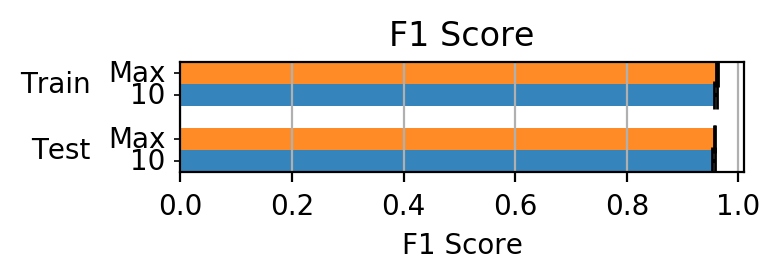

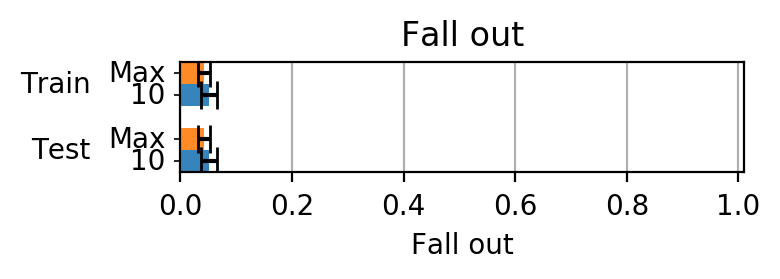

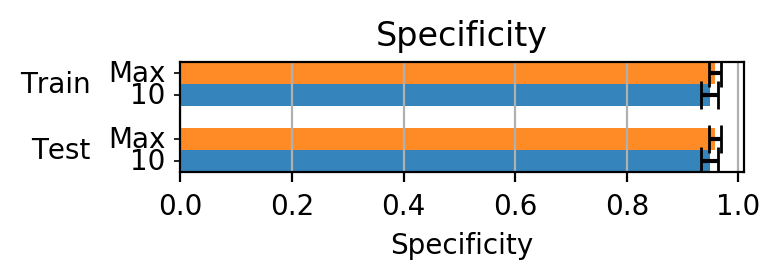

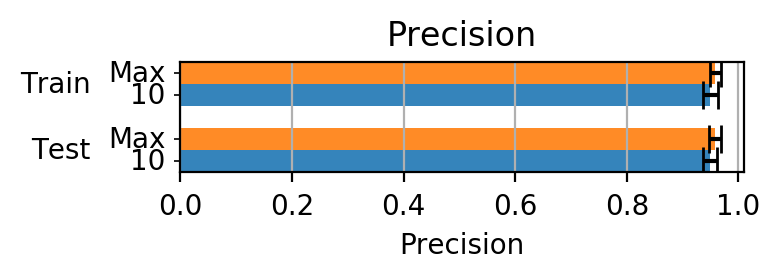

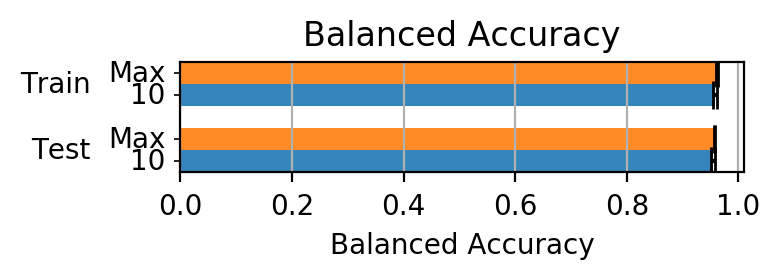

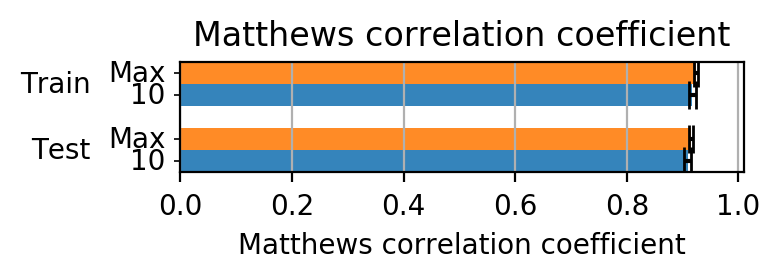

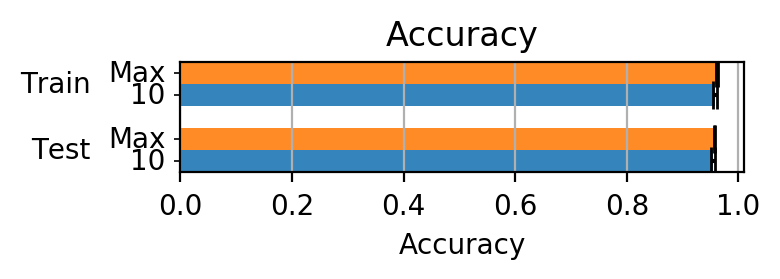

In [5]:
_ = barplots(
    df,
    groupby=["run_type", "Max Neighbours"],
    show_legend=False,
    height=4,
    orientation="horizontal"
)